In [ ]:
!pip install seaborn matplotlib wandb

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.10.3-cp312-cp312-macosx_11_0_arm64.whl (8.1 MB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 1.6 MB/s eta 0:00:00a 0:00:01
Using cached kiwisolver-1.4.8-cp312-cp312-macosx_11_0_arm64.whl (65 kB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [seaborn]m5/7 [matplotlib]


In [6]:
# get data from wandb
import wandb
import pandas as pd

wandb.init(project="llm-fp8")
api = wandb.Api()

In [21]:
run_fp8 = api.run("vinhpx/llm-fp8/1wrvtatx")

run_bf16 = api.run("vinhpx/llm-fp8/nr9nwejt")

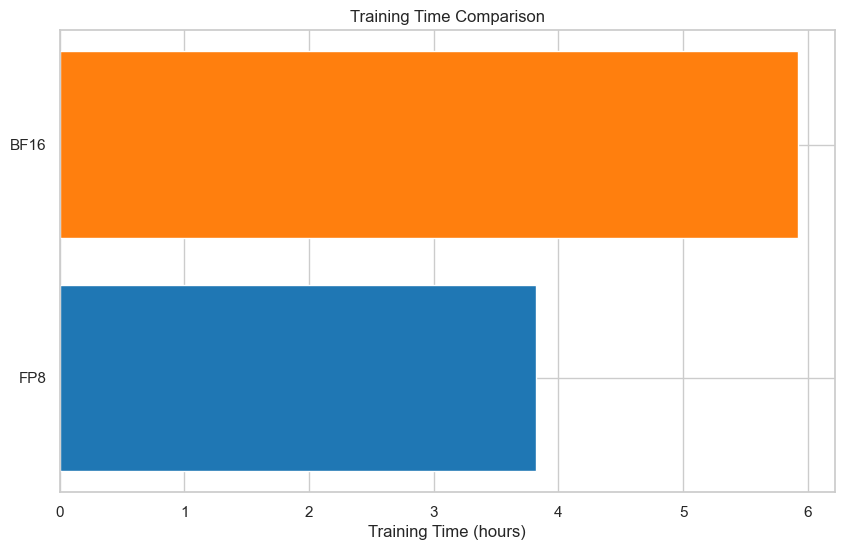

In [29]:
# get training time
runtime_fp8_seconds = run_fp8.summary.get("_runtime", 0) / 3600  # convert seconds to hours
runtime_bf16_seconds = run_bf16.summary.get("_runtime", 0) / 3600  # convert seconds to hours
# plot training time
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.barh(['FP8', 'BF16'], [runtime_fp8_seconds, runtime_bf16_seconds], color=['#1f77b4', '#ff7f0e'])
plt.xlabel('Training Time (hours)')
plt.title('Training Time Comparison')
plt.show()

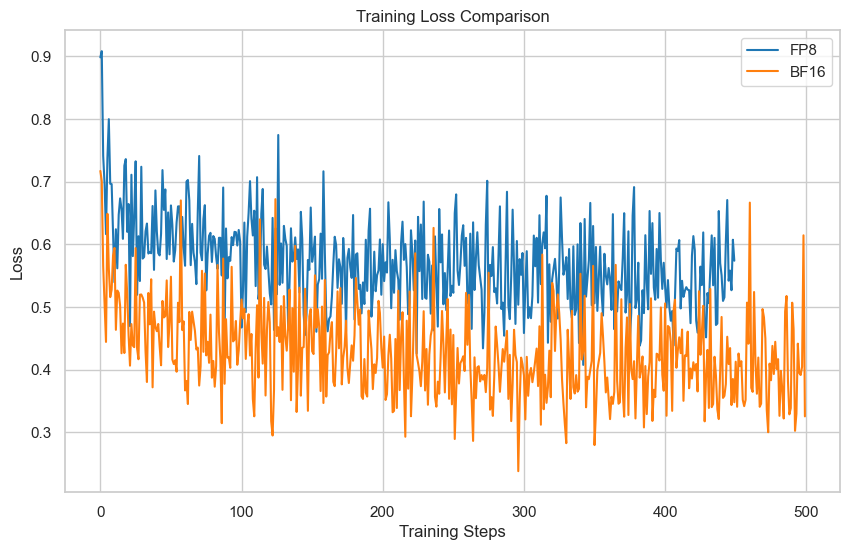

In [23]:
# training loss
fp8_loss = run_fp8.history(keys=["Train/Loss"])
bf16_loss = run_bf16.history(keys=["Train/Loss"])
fp8_loss_step = run_fp8.summary.get("Train/Steps", 0)
bf16_loss_step = run_bf16.summary.get("Train/Steps", 0)
plt.figure(figsize=(10, 6))
plt.plot(fp8_loss['Train/Loss'], label='FP8', color='#1f77b4')
plt.plot(bf16_loss['Train/Loss'], label='BF16', color='#ff7f0e')
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.show()


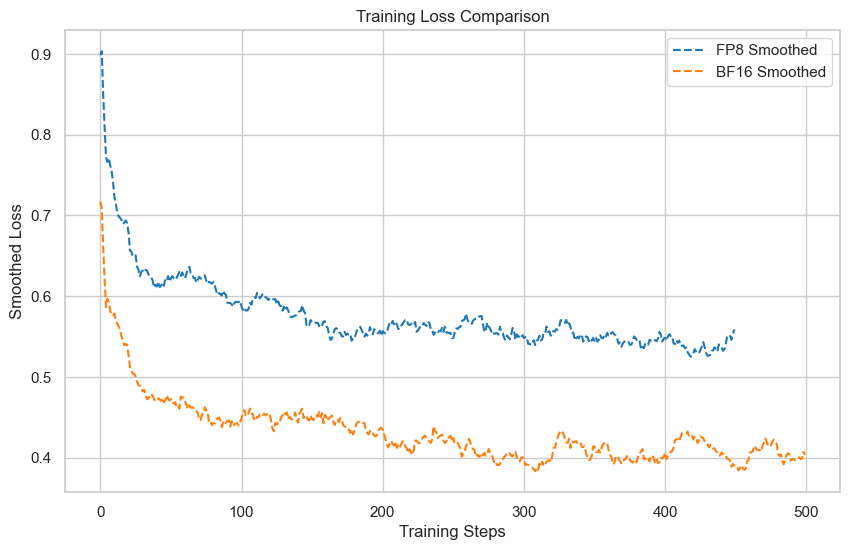

In [25]:
# Calculate and plot moving average (smoothed) training loss
def moving_average(data, window_size=10):
    return pd.Series(data).rolling(window=window_size, min_periods=1).mean()

fp8_loss_smooth = moving_average(fp8_loss['Train/Loss'], window_size=20)
bf16_loss_smooth = moving_average(bf16_loss['Train/Loss'], window_size=20)

plt.figure(figsize=(10, 6))
plt.plot(fp8_loss_smooth, label='FP8 Smoothed', color='#1f77b4', linestyle='--')
plt.plot(bf16_loss_smooth, label='BF16 Smoothed', color='#ff7f0e', linestyle='--')
plt.xlabel('Training Steps')
plt.ylabel('Smoothed Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.show()

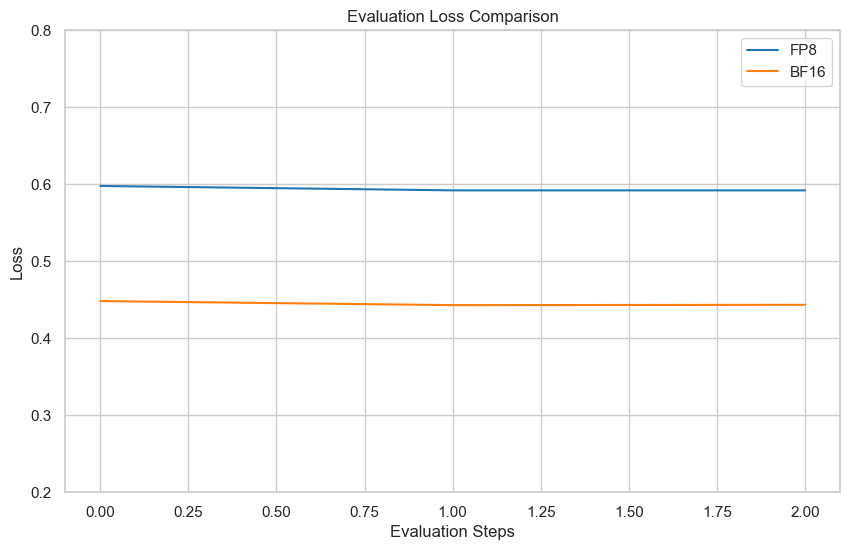

In [28]:
# eval loss
fp8_eval_loss = run_fp8.history(keys=["Eval/Loss"])
bf16_eval_loss = run_bf16.history(keys=["Eval/Loss"])
fp8_eval_loss_step = run_fp8.summary.get("Eval/Steps", 0)
bf16_eval_loss_step = run_bf16.summary.get("Eval/Steps", 0)
plt.figure(figsize=(10, 6))
plt.plot(fp8_eval_loss['Eval/Loss'], label='FP8', color='#1f77b4')
plt.plot(bf16_eval_loss['Eval/Loss'], label='BF16', color='#ff7f0e')
plt.xlabel('Evaluation Steps')
plt.ylabel('Loss')
plt.title('Evaluation Loss Comparison')
plt.ylim(0.2, 0.8)
plt.legend()
plt.show()